# Análise de dados - Airbnb (Rio de Janeiro)

Não é nenhuma novidade que as plataformas estão ficando cada vez mais abertas para o público anunciar seus próprios negócios. Não funciona diferente no Airbnb, onde todos que possuirem um apartamento/quarto/casa para locação, podem se cadastrar e conseguir um bom lucro com isso.

Esta análise foi realizada para a cidade do Rio de Janeiro, pois como sou brasileiro preferi analisar algum lugar do Brasil e infelizmente os únicos dados disponibilizados pela empresa foi desta cidade.

<center><img src="https://github.com/mazzidougs/Airbnb/blob/main/thales-botelho-de-sousa-9e0dAX1bUsA-unsplash.jpg?raw=true"></center>

* O arquivo `csv` com os dados de 23635 pessoas e 16 atributos pode ser baixado [neste link](http://insideairbnb.com/get-the-data.html).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importando o link para var df
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-07-17/visualisations/listings.csv')

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*.

In [3]:
df.head(None)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.965990,-43.179400,Entire home/apt,170,5,265,2021-05-21,2.11,1,317,14,NaN
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.984050,-43.201890,Entire home/apt,283,3,85,2017-04-22,0.88,1,154,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.977350,-43.191050,Entire home/apt,160,7,238,2019-04-27,1.89,2,316,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.988390,-43.192320,Entire home/apt,256,2,181,2019-12-06,1.97,1,167,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.981070,-43.191360,Entire home/apt,120,3,363,2019-06-15,3.05,1,92,31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23630,51081209,2BR Ipanema Beauty Apartment with Ocean View,11070008,BlissRio,NaN,Ipanema,-22.985292,-43.197643,Entire home/apt,270,3,0,NaN,NaN,8,66,0,NaN
23631,51083443,Acolhedor flat à beira-mar na Barra da Tijuca,319227148,Anfitrião Prime,NaN,Barra da Tijuca,-23.009308,-43.355782,Entire home/apt,9440,1,0,NaN,NaN,12,220,0,NaN
23632,51084459,Duplex com churrasqueira e Wi-Fi em Lins no RJ,319227148,Anfitrião Prime,NaN,Méier,-22.903879,-43.273692,Entire home/apt,271,1,0,NaN,NaN,12,365,0,NaN
23633,51087547,Amplo apartamento com 3 quartos e dois banheiros,13411812,Fernando,NaN,Ipanema,-22.987000,-43.200670,Entire home/apt,600,3,0,NaN,NaN,4,358,0,NaN


### Verificando quantos atributos e quantas entradas o nosso conjunto de dados possui e quais os tipos das variáveis

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.


In [ ]:
df.shape #(variaveis, entradas)

(23635, 16)

In [9]:
print('Linhas:\t\t {}'.format(df.shape[0]))
print('Colunas:\t {}\n'.format(df.shape[1]))

display(df.dtypes)

Linhas:		 23635
Colunas:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### Porcentagem de valores ausentes no dataset

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` e `license` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.


In [16]:
#ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100
#neighbouhood possui 100% de valores faltantas (nao possui dados)

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  36.619420
last_review                        36.619420
name                                0.088851
host_name                           0.029617
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

In [11]:
df.sort_values #ordena os valores

#df.sort_values(by=['neighbourhood_group', 'host_name'])
#neste outro podemos usar para ordenar apenas as colunas
#que quisermos

<bound method DataFrame.sort_values of              id  ... license
0         17878  ...     NaN
1         24480  ...     NaN
2         25026  ...     NaN
3         35636  ...     NaN
4         35764  ...     NaN
...         ...  ...     ...
23630  51081209  ...     NaN
23631  51083443  ...     NaN
23632  51084459  ...     NaN
23633  51087547  ...     NaN
23634  51091220  ...     NaN

[23635 rows x 18 columns]>

### Tipo de distribuição das variáveis 

Para identificar a distribuição das variáveis, irei plotar um histograma para cada atributo, exceto `neighbourhood_group` e `license`. Juntamente com a descrição estatistica de nosso dataset.


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.363500e+04,2.363500e+04,23635.000000,23635.000000,23635.000000,23635.000000,23635.000000,14980.000000,23635.000000,23635.000000,23635.000000
mean,2.583630e+07,1.017046e+08,-22.966148,-43.249278,751.329300,4.919018,13.207489,0.602536,7.396361,246.030379,2.746943
std,1.620414e+07,1.110507e+08,0.035113,0.097131,5477.207312,20.702676,31.962546,0.864291,22.759622,123.474424,7.241630
min,1.787800e+04,3.607000e+03,-23.072620,-43.720990,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.230374e+07,1.407128e+07,-22.984680,-43.306905,150.000000,1.000000,0.000000,0.090000,1.000000,130.000000,0.000000
50%,2.494374e+07,6.029813e+07,-22.972000,-43.196360,256.000000,2.000000,2.000000,0.240000,1.000000,297.000000,0.000000
75%,4.139697e+07,1.562663e+08,-22.951960,-43.186300,511.000000,4.000000,10.000000,0.790000,3.000000,364.000000,2.000000
max,5.109122e+07,4.131633e+08,-22.749690,-43.104400,586229.000000,1100.000000,466.000000,26.960000,195.000000,365.000000,186.000000


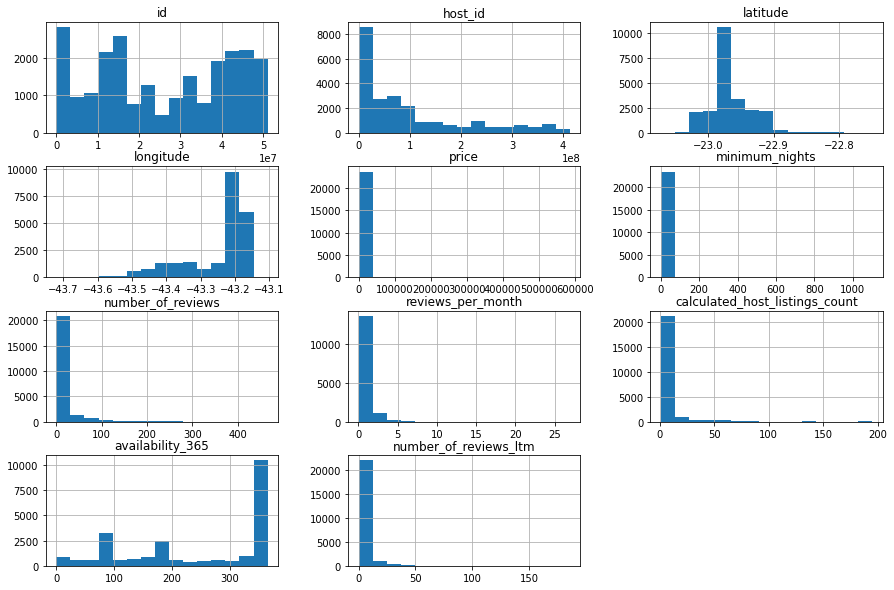

In [22]:
df_hist = df.drop(['neighbourhood_group', 'license'], axis=1)

df_hist.hist(bins=15, figsize=(15, 10));
df_hist.describe()

Verificando se há outliers

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
#informações estatisticas de apenas algumas colunas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23635.000000,23635.000000,23635.000000,14980.000000,23635.000000,23635.000000
mean,751.329300,4.919018,13.207489,0.602536,7.396361,246.030379
std,5477.207312,20.702676,31.962546,0.864291,22.759622,123.474424
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.090000,1.000000,130.000000
50%,256.000000,2.000000,2.000000,0.240000,1.000000,297.000000
75%,511.000000,4.000000,10.000000,0.790000,3.000000,364.000000
max,586229.000000,1100.000000,466.000000,26.960000,195.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 599, porém seu valor máximo é 586229.
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.



#### Boxplot para minimum_nights

Valores maiores que 30 para noites mínimas são dados fora do padrão, atrapalham nossa análise, então descobrimos que acima de 30 noites, os apartamentos possuem 202 entradas (dos 23365), que correspondem 0.85% dos dados, isso implica que esses dados não são tão interessantes.

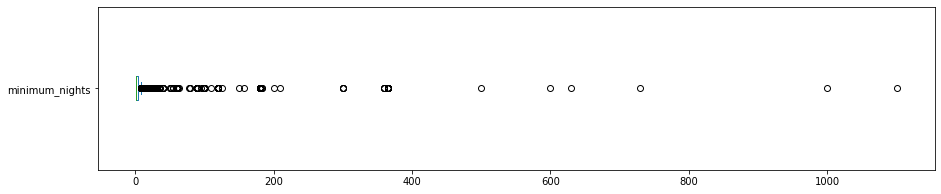

minimum_nights: valores acima de 30:
202 entradas
0.8547%


In [23]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


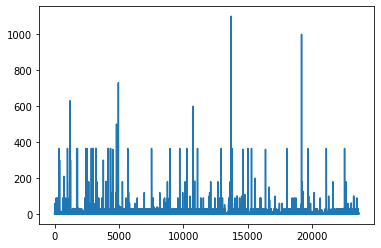

In [24]:
#sem parametros de exibição
df.minimum_nights.plot();

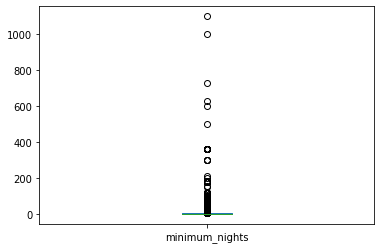

In [25]:
#do tipo boxplot
df.minimum_nights.plot(kind='box');

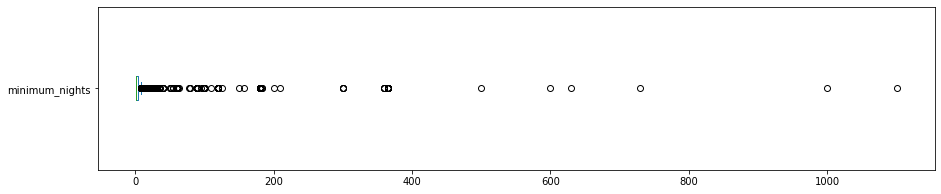

In [26]:
#agora com o gráfico na horizontal e com o tamanho ajustado
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));

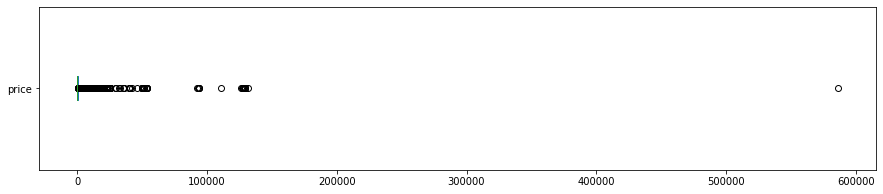

price: valores acima de 1500:
1563 entradas
6.6131%


In [27]:
#boxplot para price
df.price.plot(kind='box', vert=False, figsize=(15, 3));
plt.show()

#checando as noites pelo preço maior que 1500
print("price: valores acima de 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

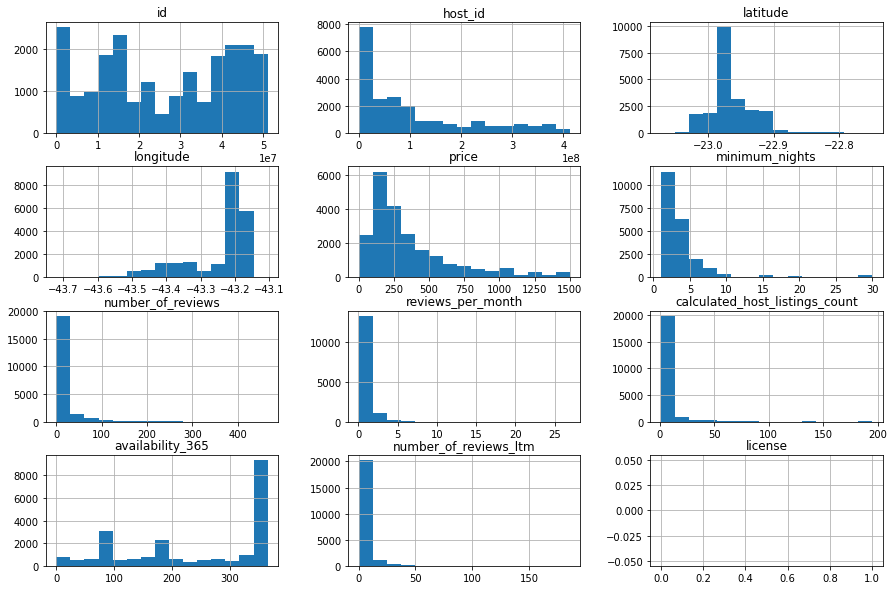

In [28]:
#remover os 'outliers' em um novo dataframe
df_clean = df.copy() #copiando df para uma copia de df chamada df_clean
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover 'neighbourhood_group' pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True) #axis = 1 (refere-se a coluna)

#plotar o histogramas para as variáveis numéricasw
df_clean.hist(bins=15, figsize=(15,10));

numbers_of_reviews: valores acima de 100:
279 entradas
1.1805%


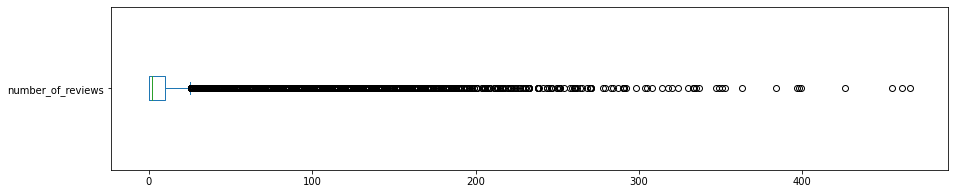

In [29]:
#podemos melhorar o grafico de reviews também

#verificando os outliers
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3));

#verificando os números maiores que 100
print("numbers_of_reviews: valores acima de 100:")
print("{} entradas".format(len(df[df.number_of_reviews > 150])))
print("{:.4f}%".format((len(df[df.number_of_reviews > 150]) / df.shape[0])*100))

#removendo os dados excedentes com drop
df_clean.drop(df_clean[df_clean.number_of_reviews > 150].index, axis=0, inplace=True)

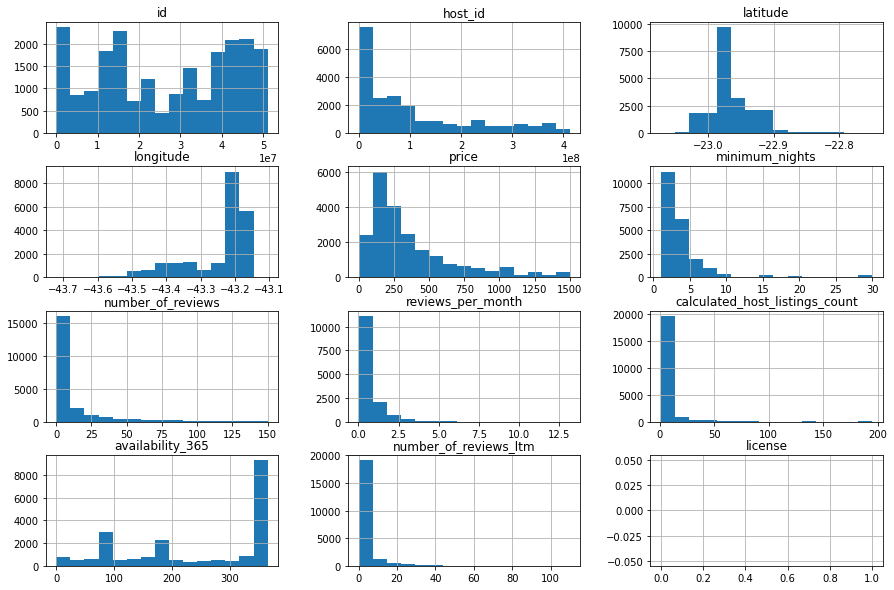

In [31]:
df_clean.hist(bins=15, figsize=(15,10));
#note que foram removidos do eixo x os outliers dos atributos

###Qual a correlação existente entre as variáveis

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
#correlação não é causa e efeito (spurious correlation https://www.tylervigen.com/spurious-correlations)

In [32]:
#me dá as correlações de todas as colunas
df_clean.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,1.000000,0.558905,-0.027045,-0.025535,-0.156113,-0.105710,-0.267925,0.232968,0.094060,-0.157705,0.060406,NaN
host_id,0.558905,1.000000,0.023647,-0.104458,-0.119134,-0.088609,-0.154612,0.137135,0.016398,-0.073518,0.026942,NaN
latitude,-0.027045,0.023647,1.000000,0.337881,-0.187987,-0.023894,-0.066297,-0.054548,-0.079358,0.064657,-0.076156,NaN
longitude,-0.025535,-0.104458,0.337881,1.000000,-0.111864,-0.035703,0.101489,0.017664,0.083036,-0.080575,0.013928,NaN
price,-0.156113,-0.119134,-0.187987,-0.111864,1.000000,0.132711,-0.172124,-0.155291,0.078064,0.128078,-0.146051,NaN
minimum_nights,-0.105710,-0.088609,-0.023894,-0.035703,0.132711,1.000000,-0.067183,-0.091048,-0.050339,0.010557,-0.097521,NaN
number_of_reviews,-0.267925,-0.154612,-0.066297,0.101489,-0.172124,-0.067183,1.000000,0.596238,-0.055493,-0.164472,0.606050,NaN
reviews_per_month,0.232968,0.137135,-0.054548,0.017664,-0.155291,-0.091048,0.596238,1.000000,0.007802,-0.205535,0.779087,NaN
calculated_host_listings_count,0.094060,0.016398,-0.079358,0.083036,0.078064,-0.050339,-0.055493,0.007802,1.000000,0.015056,-0.025522,NaN
availability_365,-0.157705,-0.073518,0.064657,-0.080575,0.128078,0.010557,-0.164472,-0.205535,0.015056,1.000000,-0.173402,NaN


In [33]:
#criar uma matriz de correlação, me dá a correlação entra as colunas que escolhi
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 
                 'reviews_per_month', 'calculated_host_listings_count',
                 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.132711,-0.172124,-0.155291,0.078064,0.128078
minimum_nights,0.132711,1.000000,-0.067183,-0.091048,-0.050339,0.010557
number_of_reviews,-0.172124,-0.067183,1.000000,0.596238,-0.055493,-0.164472
reviews_per_month,-0.155291,-0.091048,0.596238,1.000000,0.007802,-0.205535
calculated_host_listings_count,0.078064,-0.050339,-0.055493,0.007802,1.000000,0.015056
availability_365,0.128078,0.010557,-0.164472,-0.205535,0.015056,1.000000


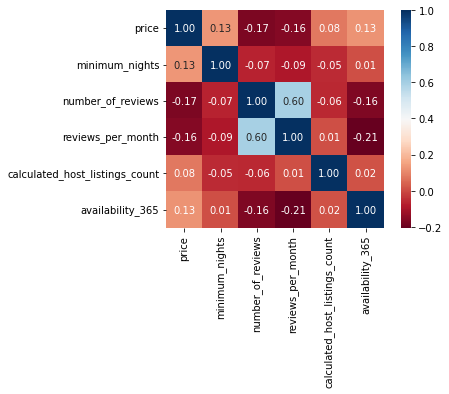

In [34]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', 
            square=True, linecolor='white', annot=True);

###Qual o tipo de imóvel mais alugado no Airbnb?

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [37]:
#quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()
#entire home/apt é o mais alugado

Entire home/apt    15363
Private room        5650
Shared room          516
Hotel room            82
Name: room_type, dtype: int64

In [38]:
#porcentagem dos dados
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.710888
Private room       0.261441
Shared room        0.023877
Hotel room         0.003794
Name: room_type, dtype: float64

In [39]:
df_clean.groupby(['neighbourhood']).price.mean()
#aqui me mostra a média do preço de cada bairro

neighbourhood
Abolição             339.000000
Acari                250.000000
Alto da Boa Vista    484.818182
Anchieta             800.000000
Andaraí              271.027778
                        ...    
Vila Valqueire       412.000000
Vila da Penha        138.750000
Vista Alegre          50.000000
Zumbi                149.000000
Água Santa           340.000000
Name: price, Length: 153, dtype: float64

In [40]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
#esse slice no fim, está servindo apenass para mostraar os 10 primeiros valores (0 a 9)

neighbourhood
Caju                  1208.000000
Anchieta               800.000000
Vaz Lobo               789.500000
Realengo               711.500000
Pavuna                 590.666667
Sepetiba               556.500000
Rocha Miranda          551.000000
Joá                    524.864865
Complexo do Alemão     520.000000
Lagoa                  509.156757
Name: price, dtype: float64

In [41]:
#ver a quandidade de imoveis no complexo de alemao
print(df[df.neighbourhood == 'Complexo do Alemão'].shape)

#ver as entradas do complexo do alemão
df[df.neighbourhood == 'Complexo do Alemão']

(2, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9612,17148972,Casa Brota,101966262,Thamyra,NaN,Complexo do Alemão,-22.85833,-43.27465,Private room,140,1,6,2018-10-07,0.11,1,90,0,NaN
10669,21448656,Casa 1 quarto alem,155642978,Felipe,NaN,Complexo do Alemão,-22.85998,-43.27476,Shared room,900,1,1,2017-11-28,0.02,1,365,0,NaN


In [42]:
print(df[df.neighbourhood == 'Leblon'].shape)
df[df.neighbourhood == 'Leblon']

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)
df['neighbourhood']

(1085, 18)


0             Copacabana
1                Ipanema
2             Copacabana
3                Ipanema
4             Copacabana
              ...       
23630            Ipanema
23631    Barra da Tijuca
23632              Méier
23633            Ipanema
23634         Copacabana
Name: neighbourhood, Length: 23635, dtype: object

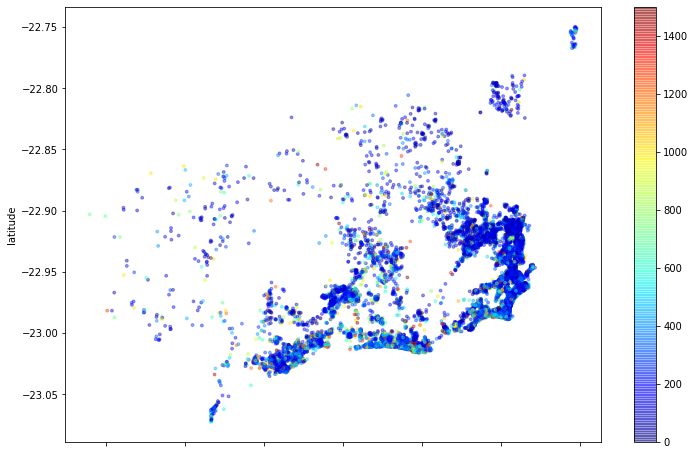

In [43]:
#plotando os imoveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.4,
                 c = df_clean['price'], s = 8, cmap = plt.get_cmap('jet'),
                 figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.